# experimental study (parameter tuning)
#### on randomly generated instances of MS across a range of $n$ and $m$ values in order to select an appropriate value for $k$.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random
import re
from itertools import compress
from copy import deepcopy

In [2]:


class agent:
    def __init__(self): 
        self.initialTime = time.time()
        self.allocation = {} # a dict for tracking  the allocated jobs to machines
        self.workload = np.zeros(m) # np.array of length m, where self.workload[machine] = sum of processing times of jobs assigned to machine
        self.cost = None # cost of current feasible solution
        self.costTrajectory = [] # list of cost of feasible solution found in each step
        self.workload_so_far = []
        self.allocation_so_far = []
        self.time_taken = None

        
    # generates a greedy initial feasible solution
    def generateGreedySolution(self):
        for i in range(m):
            self.allocation[i] = [p[i]]
            self.workload[i] += p[i]
        for i in range(m,len(p)):
            worker = np.argmin(self.workload)
            self.allocation[worker].append(p[i])
            self.workload[worker] += p[i]
        self.cost = np.max(self.workload)
        self.costTrajectory.append(self.cost)
        
        
    # switch assigned machine of 'job' to 'toMachine'
    def switchMachine(self,  job, fromMachine, toMachine):
        self.workload[fromMachine] += - job
        self.allocation[fromMachine].remove(job)
        self.workload[toMachine] += job
        self.allocation[toMachine].append(job)
    
    def Swap(self, Big, big_candidate, Small, small_candidate):
        self.switchMachine(Big, big_candidate, small_candidate)
        self.switchMachine(Small, small_candidate, big_candidate)
    
    def greedySearchIteration(self,k):
        ind = np.argsort(self.workload)
        for i in range(k):
            big_candidate = ind[-(i+1)]
            small_candidate = ind[i]
            Big = np.max(self.allocation[big_candidate])
            Small = np.max(list(compress(self.allocation[small_candidate],
                                     [i < Big for i in self.allocation[small_candidate]])))
            self.Swap(Big, big_candidate, Small, small_candidate)
        self.cost = np.max(self.workload)
        self.costTrajectory.append(self.cost)
        self.workload_so_far.append(deepcopy(self.workload))
        self.allocation_so_far.append(deepcopy(self.allocation))
    
    def print_results(self):
        plt.bar(range(m),self.workload)
        plt.show()
#         print('best workload found:', self.workload)
#         print('best allocation found:', self.allocation)
        print('neighbours visited:', self.costTrajectory)
        print('approximation ratio:',  self.cost/np.average(self.workload))
        print('time taken:', self.time_taken)
    
    def greedySearch(self,totalTime,k):
        self.generateGreedySolution()
        self.workload_so_far.append(deepcopy(self.workload))
        self.allocation_so_far.append(deepcopy(self.allocation))
        while time.time() - self.initialTime < totalTime - 0.31:
            self.greedySearchIteration(k)
            if self.cost > self.costTrajectory[-2]:
                self.workload = deepcopy(self.workload_so_far[-2])
                self.allocation = deepcopy(self.allocation_so_far[-2])
                self.cost = np.max(self.workload)
                self.costTrajectory.append(self.cost)
                self.time_taken = time.time() - self.initialTime
#                 self.print_results()
                return
            if self.cost == self.costTrajectory[-2]:
                self.time_taken = time.time() - self.initialTime
#                 self.print_results()
                return
        print('*****ALLOCATED TIME EXPIRED!*****')
        self.time_taken = time.time() - self.initialTime
#         print('BEST RESULT:')
#         self.print_results()
    
    def verifyFeasibleSolution(self):
        # check that each job is assigned to exactly one machine
        assert(sum([len(self.allocation[i]) for i in range(m)]) == len(p))
        # check that there are at most m machines that have jobs assigned to them
        assert(len(self.allocation) <= m)

        # check that the workloads are as indicated in A.workload
        for i in range(m):
            assert(self.workload[i] == sum(self.allocation[i]))

        # check that the maximum of the workloads (i.e. the cost) is as indicated in A.cost
        assert(np.isclose(self.cost, np.max(self.workload)))

In [3]:
M = np.random.randint(200,400,10)
P = np.random.randint(2000,40000,10)
instances = {i:np.append(30,np.append(M[i],1 + np.random.randint(np.random.randint(1000,10000),size = P[i]) )) for i in range(len(M))}
def set_inst(ind):
    '''
    imports a text file instance, converts it to an array and then allocates it to p and m, 
    where p are the jobs and m is the number of machines
    '''
    inst = ind
    global p, m, allowableTime
    p =  inst[2:]
    p.sort()
    p = p[::-1]
    m = inst[1]
    allowableTime = inst[0]

In [4]:
set_inst(instances[0])

In [5]:
A = agent()

In [6]:
A.generateGreedySolution()

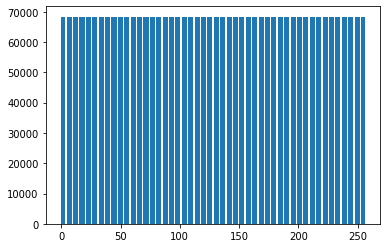

neighbours visited: [68367.0]
approximation ratio: 1.0003979883312555
time taken: None


In [8]:
A.print_results()

In [22]:
costs = []
times = []
for k in range(10):
    set_inst(instances[0])
    A = agent()
    A.greedySearch(allowableTime,k)
    A.verifyFeasibleSolution()
    times.append(A.time_taken)
    costs.append(A.costTrajectory[-1])
   

        
        

In [23]:
costs

[323251.0,
 323251.0,
 323251.0,
 323251.0,
 323251.0,
 323251.0,
 323251.0,
 323251.0,
 323251.0,
 323251.0]

In [78]:
# def create_instance(inp, filename):
#     txter = open(filename, "w")
#     for item in inp:
#         txter.write(str(item))
#         txter.write('\n')
#     txter.close()

In [ ]:
# def import_inst(filename):
#     '''
#     imports a text file instance, converts it to an array and then allocates it to p and m, 
#     where p are the jobs and m is the number of machines
#     '''
#     inst = list(map(int, re.findall('\d+', str([line.rstrip('\n') for line in open(filename)]))))
#     global p, m, allowableTime
#     p =  inst[2:]
#     p.sort()
#     p = p[::-1]
#     m = inst[1]
#     allowableTime = inst[0]

In [85]:
# k = "instance"
# for i in range(len(M)):
#     print(k + str(i) + ".txt")

instance0.txt
instance1.txt
instance2.txt
instance3.txt
instance4.txt
instance5.txt
instance6.txt
instance7.txt
instance8.txt
instance9.txt
